In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
adults = pd.read_csv("/adult (2).csv")

In [8]:
adults.head()

,Age,Workclass,Fnlwgt,Education,Education Years,Marital status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native country,Net capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
adults.shape

(16281, 15)

In [11]:
adults.describe()

,Age,Fnlwgt,Education Years,Capital_gain,Capital_loss,Hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [12]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              16281 non-null  int64 
 1   Workclass        16281 non-null  object
 2   Fnlwgt           16281 non-null  int64 
 3   Education        16281 non-null  object
 4   Education Years  16281 non-null  int64 
 5   Marital status   16281 non-null  object
 6   Occupation       16281 non-null  object
 7   Relationship     16281 non-null  object
 8   Race             16281 non-null  object
 9   Sex              16281 non-null  object
 10  Capital_gain     16281 non-null  int64 
 11  Capital_loss     16281 non-null  int64 
 12  Hours_per_week   16281 non-null  int64 
 13  Native country   16281 non-null  object
 14  Net capital      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


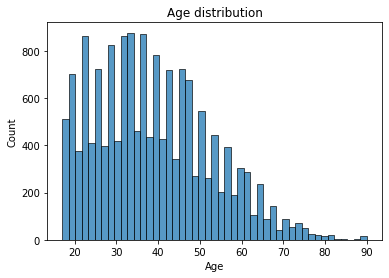

In [13]:
sns.histplot(adults.Age)
plt.title('Age distribution')
plt.show()

In [31]:
adults['Sex']=adults['Sex'].replace(['Male','Female'],[0,1])

In [32]:
adults.head()

,Age,Workclass,Fnlwgt,Education,Education Years,Marital status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native country,Net capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,Private,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [33]:
X = adults.iloc[:, [0,4]].values
y = adults.iloc[:, 14].values

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train_s, y_train)

KNeighborsClassifier()

In [37]:
y_pred=classifier.predict(X_test_s)
print(y_pred)

[' <=50K.' ' <=50K.' ' >50K.' ... ' <=50K.' ' <=50K.' ' <=50K.']


In [38]:
print(y_test)

[' >50K.' ' <=50K.' ' <=50K.' ... ' <=50K.' ' <=50K.' ' <=50K.']


In [39]:
from sklearn import metrics
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(cm, '\n\n')
print('---------------------------------------')
result=metrics.classification_report(y_test,y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.75


Confusion Matrix:
[[3245  421]
 [ 787  432]] 


---------------------------------------
Classification Report:

              precision    recall  f1-score   support

      <=50K.       0.80      0.89      0.84      3666
       >50K.       0.51      0.35      0.42      1219

    accuracy                           0.75      4885
   macro avg       0.66      0.62      0.63      4885
weighted avg       0.73      0.75      0.74      4885



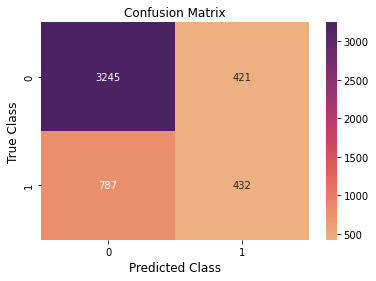

In [40]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()